In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

#%matplotlib inline

# Vectors

This notebook uses many images from the excellent [A Visual Intro to NumPy and Data Representation](https://jalammar.github.io/visual-numpy/) from [Jay Alammar](https://jalammar.github.io/).

## Axes

Axes == dimension

i.e. three axes == three dimensions

## Scalars, vectors, matricies and tensors

See Chapter 2 of [Deep Learning](https://www.deeplearningbook.org/).

Being specific about how we use these terms (there is no solid concensus - many people (including me) will use array and/or tensor).

### Scalar

$\textit{x}$

- single number
- lowercase, italic $\textit{x}$
- point

### Vector

$\textbf{x} = \begin{bmatrix}x_{1} \\ x_{2} \\ \vdots \\ x_{n} \end{bmatrix}$

- array of $n$ numbers
- lowercase, bold 
- $x_{1}$ = first element
- line

### Matrix

$\textbf{A}_{2, 2} = \begin{bmatrix}A_{1, 1} & A_{1, 2} \\ A_{2, 1} & A_{2, 2}\end{bmatrix}$

- two dimensional
- uppercase, bold $\textbf{A}_{m, n}$
- $A_{1, 1}$ = first element
- area

### Tensor

- n-dimensional
- 3 = volume
- uppercase, bold $\textbf{A}_{i,j,k}$

## When `numpy`

Linear algebra, data processing

Pandas sits on top of `numpy`:

In [2]:
#  access the numpy array that holds the data
pd.DataFrame([1, 2]).values

array([[1],
       [2]])

## What is `numpy`

Library for working with n-dimensional data
- **store and operate on data using C structures**

<img src="assets/c.png" alt="" width="350"/>

## Why `numpy`

Functionality - There is nothing that cannot be done with python lists that can be done with numpy arrays. It is sometimes just nicer to use
- vector, matrix & tensor operations

Uses less memory
- fixed data types (can also be a drawback)

Speed
- fixed data types (benefit from static typing)
- C implementation

Below we implement a sum operation using a Python loop:

In [3]:
def loop(left, right):
    data = np.zeros(left.shape[0])
    for i in range(data.shape[0]):
        data[i] = left[i] + right[i]
    return data
    
left = np.arange(10000000)
right = np.arange(10000000)

#  excuse the horrbile hack here
#  want to always print the time in seconds
res = %timeit -qo loop(left, right)

'{:.2f} seconds'.format(res.average)

'4.52 seconds'

Now lets try it using `numpy` addition:

In [4]:
res = %timeit -qo left + right

'{:.2f} seconds'.format(res.average)

'0.02 seconds'

Numpy arrays also take way storage compared to python lists, consider that example:

In [5]:
py_arr = [1,2,3,4,5,6] # Normal python list
numpy_arr = np.array([1,2,3,4,5,6]) # Numpy array 

sizeof_py_arr = sys.getsizeof(1) * len(py_arr)           # Calculating size for python list
sizeof_numpy_arr = numpy_arr.itemsize * numpy_arr.size   # Calculating size for numpy array

# Printing the ratio of python list to numpy array
print("Storage size of python lists is " + str(sizeof_py_arr / sizeof_numpy_arr) + " times bigger than numpy arrays")

Storage size of python lists is 3.5 times bigger than numpy arrays


Note that not only is `numpy` quicker, it is **more readable**!

The reason that `numpy` is faster is **vectorization**
- running multiple operations from a single instruction

Many CPU's have operation that run in parallel (modern x86 chips have the SSE instructions)

Vectorization is
- the process of rewriting a loop 
- instead of processing a single element of an array N times
- it processes 4 elements of the array simultaneously N/4 times

## `list` versus `np.array`

Python list
- general-purpose container - can hold different data types
- support (fairly) efficient insertion, deletion, appending, and concatenation
- list comprehensions make them easy to construct and manipulate
- only a few list operations can be carried out in C (because of the need for type checking)
- the list holds pointers to items scattered across memory

Numpy array
- **only one data type**
- less flexible
- vectorized operations
- fixed size
- data in one place in memory

Only holding one data type means that numpy can efficiently store data in memory

A list doesn't know what the next object will be - this makes storing it in memory challenging

```python
[0, 1.0, '2.0']
```

We can make an array from a list - `numpy` will make assumptions about what datatype the array should hold:

In [6]:
#  the integer 10 is converted to a float
a = np.array([10, 20.0, 0])

In [7]:
a[0] = '3'

In [8]:
a.dtype

dtype('float64')

We can see the data type by accessing the `.dtype` attribute:

In [9]:
#  64 bits (0 or 1) per float
np.array([10, 20.0]).dtype

dtype('float64')

We can change the datatype of an array:

In [10]:
np.array([10, 20.0]).astype('int')

array([10, 20])

Note that changing the datatype will by default create a newly allocated array (new location in memory) - you can control this using a an argument:

In [11]:
np.array([10, 20.0], copy=False).astype('int')

array([10, 20])

We can see the number of elements in an array:

In [12]:
np.array([10, 20.0, 30]).size

3

For a vector the size will be the same as the shape:

In [13]:
np.array([10, 20.0, 30]).shape

(3,)

We can also get the number of elements in a vector using the Python bulitin `len`:

In [14]:
len(np.array([10, 20.0, 30]))

3

## Vectors

$\begin{bmatrix}x_{1} & x_{2} & \cdots & x_{n} \end{bmatrix}$

- array of $n$ numbers
- lowercase, bold $\textbf{x}$
- $x_{1}$ = first element
- line

We can visualize a vector as a line:

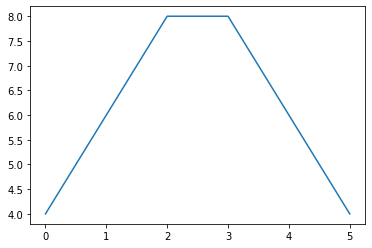

In [15]:
data = np.array([4, 6, 8, 8, 6, 4])

plt.plot(data)

## Vector Arithmetic

In Python when we add iterables together they are joined:

In [16]:
[0, 1, 2] + [1]

[0, 1, 2, 1]

`numpy` works differently - addition works **element wise**:

<img src="assets/add.png" alt="" width="300"/>

In [17]:
np.array([1, 2]) + np.array([1, 1])

array([2, 3])

All of the logic above holds for subtraction, multiplication etc:

In [18]:
np.array([0, 1, 2]) - np.array([1]) 

array([-1,  0,  1])

In [19]:
np.array([0, 1, 2]) * np.array([2]) 

array([0, 2, 4])

Common problem to multiply every number of a list with a scalar represents way more work using lists compared to np arrays

In [20]:
np_array = np.array([1, 2, 3]) # Numpy list
py_list = [1, 2, 3] # Python list

np_double = np_array * 2 # Doubling the numpy array 
list_double = [(i*2) for i in py_list] # Doubling the list

Next to vector summing, of course it is also possible to take the product

In [21]:
array = np.array([1, 2, 3])
np.prod(array)

6

## Broadcasting

The smaller array will be broadcast across the larger array

<img src="assets/broad.png" alt="" width="300"/>

In [22]:
np.array([1, 2]) + np.array([1.6]) 

array([2.6, 3.6])

Note how different adding lists together is:

In [23]:
[1, 2] + [1.6]

[1, 2, 1.6]

Broadcasting is important because the larger array **keep its shape**
- matrix multiplication (ie dot products) often result in differently shaped arrays

## Working in a single dimension

Vectors - flat lists

### Indexing

<img src="assets/idx.png" alt="" width="500"/>

### Aggregation

<img src="assets/agg.png" alt="" width="800"/>

## Practical 

Calculate the absolute difference between the sum of squared numbers between 1 and 100 and the square of their sum, once in pure python and with numpy arrays: 
$$ |(1^2 + 2^2 + 3^2 + ...) - (1 + 2 + 3 + ...)^2|$$ 


### Pure python:

### Numpy array

## Answers:
You are encouraged to look at the solutions after you gave it a serious try 

In [24]:
from Answers import purepython, numpyarray

In [38]:
print(purepython())
%timeit purepython()

25164150
27.4 µs ± 256 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [39]:
print(numpyarray())
%timeit numpyarray()

25164150
12.4 µs ± 700 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Vector norms

Size of a vector

Function that maps from a vector to a non-negative scalar

$||x||_{p} = \left( \sum |x|^{p} \right)^{\frac{1}{p}} $

A common operation in machine learning is **gradient clipping** - this can be done by clipping by value, norm or global norm
- global norm will keep their relative scale 

We can do a norm in `numpy` using:

In [27]:
p = 2

%timeit sum([abs(x)**p for x in data])**(1 / p)

7.08 µs ± 28.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [28]:
data = np.arange(100000)

%timeit np.linalg.norm(data, ord=2)

78.4 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Making vectors

`np.arange` - similar to the Python builtin `range`

In [29]:
np.arange(start=0, stop=10, step=2)

array([0, 2, 4, 6, 8])

`np.linspace` - evenly spaced between two points

In [30]:
np.linspace(0, 100, 15)

array([  0.        ,   7.14285714,  14.28571429,  21.42857143,
        28.57142857,  35.71428571,  42.85714286,  50.        ,
        57.14285714,  64.28571429,  71.42857143,  78.57142857,
        85.71428571,  92.85714286, 100.        ])

## Sampling random uniform

This can be done two ways
- `np.random.random`
- `np.random.rand`

Only difference is the shape argument is not a tuple
- saves writing the brackets

Sample uniformly across the interval [0, 1)

In [31]:
#  shape defined as a tuple
np.random.random((2, 4))

array([[0.31000845, 0.86973282, 0.98505255, 0.90699701],
       [0.30701706, 0.87060367, 0.71612774, 0.75337274]])

In [32]:
#  shape defined as *args
np.random.rand(2, 4)

array([[0.83629422, 0.17519163, 0.89813139, 0.94718323],
       [0.44876215, 0.75364015, 0.2305031 , 0.27375695]])

## Sample from a standard normal

`np.random.randn`

$\mathcal{N}(0,1)$

In [33]:
np.random.randn(2, 4)

array([[ 0.890972  ,  2.75831009,  1.74161763,  0.21406661],
       [ 0.66373078, -1.2950052 , -0.55836105, -0.15996741]])

## Sample from a Gaussian

`np.random.normal`

$\mathcal{N}(\mu,\sigma)$

We choose the statistics (mean & standard deviation)

In [34]:
np.random.normal(1, 2, size=(2, 4))

array([[ 1.64218278,  2.96783962,  2.6986944 ,  2.30691512],
       [-0.33954606,  1.6056132 , -1.45124617,  0.65339697]])

## Changing order of a numpy array
In case the order of the array is desired to be reversed, there are intuitive commands for that

In [35]:
array = np.matrix([[1, 2, 3 ,4]])
np.fliplr(array)

matrix([[4, 3, 2, 1]])

# Practical: Finding the biggest product

In the 20×20 grid below, four numbers along a diagonal line have been marked in red.

<img src="assets/number.png" alt="" width="500"/>

The product of these numbers is 26 × 63 × 78 × 14 = 1788696.

What is the greatest product of four adjacent numbers in the same direction (up, down, left, right, or diagonally) in the 20×20 grid?

### Potential approach
1. Getting the numbers in a workable format - (from string to integers, in a list, etc)
2. Writing a loop to extract a 4x4 matrix of the grid
3. Writing a function to calculate all potential products

In [36]:
num = ("""
08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50
32 98 81 28 64 23 67 10 26 38 40 67 59 54 70 66 18 38 64 70
67 26 20 68 02 62 12 20 95 63 94 39 63 08 40 91 66 49 94 21
24 55 58 05 66 73 99 26 97 17 78 78 96 83 14 88 34 89 63 72
21 36 23 09 75 00 76 44 20 45 35 14 00 61 33 97 34 31 33 95
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48""".replace("\n", " "))

## Answer:
Here you can check whether your results matches the solutions. You are encouraged to look at the code after you gave it a serious try

In [37]:
from Answers import question1
question1(num)

70600674
